Cleaned DataFrame:


Dropdown(description='Food Item 1:', options=('cream cheese', 'neufchatel cheese', 'requeijao cremoso light ca…

Dropdown(description='Food Item 2:', options=('cream cheese', 'neufchatel cheese', 'requeijao cremoso light ca…

Checkbox(value=True, description='Show Reason', style=DescriptionStyle(description_width='initial'))

Checkbox(value=True, description='Show Graph', style=DescriptionStyle(description_width='initial'))

Output()

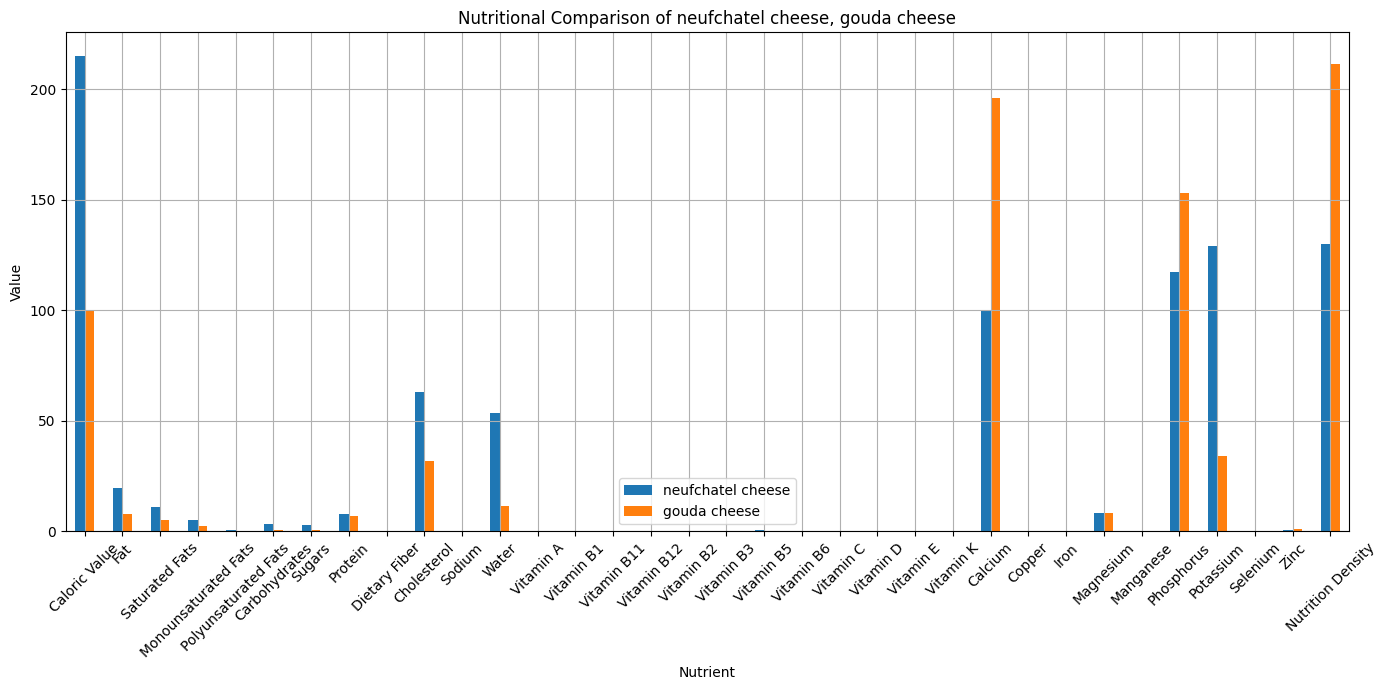

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Define file paths for CSV files
file1 = 'FOOD-DATA-GROUP1.csv'
file2 = 'FOOD-DATA-GROUP2.csv'
file3 = 'FOOD-DATA-GROUP3.csv'
file4 = 'FOOD-DATA-GROUP4.csv'
file5 = 'FOOD-DATA-GROUP5.csv'

# Read the CSV files into DataFrames
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)
df5 = pd.read_csv(file5)

# Combine the DataFrames into a single DataFrame
combined_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Drop unnecessary columns
combined_df = combined_df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

# Display the first few rows of the cleaned DataFrame
print("Cleaned DataFrame:")
combined_df.head()

# Get a list of unique food items for the dropdown menu
food_items = combined_df['food'].unique()

# Create dropdown widgets for selecting food items
food_dropdown1 = widgets.Dropdown(
    options=food_items,
    description='Food Item 1:',
    disabled=False,
    style={'description_width': 'initial'}
)

food_dropdown2 = widgets.Dropdown(
    options=food_items,
    description='Food Item 2:',
    disabled=False,
    style={'description_width': 'initial'}
)

# Create checkboxes for showing reasons and graph
show_reason_checkbox = widgets.Checkbox(
    value=True,
    description='Show Reason',
    disabled=False,
    style={'description_width': 'initial'}
)

show_graph_checkbox = widgets.Checkbox(
    value=True,
    description='Show Graph',
    disabled=False,
    style={'description_width': 'initial'}
)

# Create a container for displaying results
result_box = widgets.Output()

# Display the widgets
display(food_dropdown1, food_dropdown2, show_reason_checkbox, show_graph_checkbox, result_box)

def compare_nutrition(food_items, show_reason, show_graph):
    """
    Compare the nutritional content of multiple food items and determine which is more nutritious.
    Displays a summary and optionally reasons for the comparison.
    """
    with result_box:
        result_box.clear_output()

        # Extract data for the selected food items
        food_data = {item: combined_df[combined_df['food'] == item] for item in food_items}

        if any(data.empty for data in food_data.values()):
            print("Selected food items are not found in the dataset.")
            return

        # Specify the nutrients to compare
        nutrients_to_compare = [
            'Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats',
            'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein',
            'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A',
            'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2',
            'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C',
            'Vitamin D', 'Vitamin E', 'Vitamin K', 'Calcium', 'Copper',
            'Iron', 'Magnesium', 'Manganese', 'Phosphorus', 'Potassium',
            'Selenium', 'Zinc', 'Nutrition Density'
        ]

        # Ensure the nutrients_to_compare columns are in the DataFrame
        missing_nutrients = [nutrient for nutrient in nutrients_to_compare if nutrient not in combined_df.columns]
        if missing_nutrients:
            print(f"Warning: Missing columns in the dataset: {', '.join(missing_nutrients)}")

        # Extract values for the specified nutrients for each food item
        food_values = {item: data[nutrients_to_compare].fillna(0).values.flatten() for item, data in food_data.items()}

        # Calculate total nutritional values for each food item
        total_nutrition = {item: sum(values) for item, values in food_values.items()}

        # Determine the most nutritious food item
        best_food = max(total_nutrition, key=total_nutrition.get)
        worst_food = min(total_nutrition, key=total_nutrition.get)
        best_value = total_nutrition[best_food]
        worst_value = total_nutrition[worst_food]

        # Print a concise summary
        print(f"\n{best_food} is more nutritious than {worst_food} based on the following key metrics:")
        print(f"- Total Nutritional Value: {best_food}: {best_value:.2f}, {worst_food}: {worst_value:.2f}")

        if show_reason:
            # Identify key nutrients where one food item is better
            reasons = []
            for nutrient in nutrients_to_compare:
                best_nutrient_value = food_values[best_food][nutrients_to_compare.index(nutrient)]
                worst_nutrient_value = food_values[worst_food][nutrients_to_compare.index(nutrient)]
                if best_nutrient_value > worst_nutrient_value:
                    reasons.append(f"{best_food} has more {nutrient} ({best_nutrient_value:.2f}) compared to {worst_food} ({worst_nutrient_value:.2f}).")
            if reasons:
                print("\nReasons for better nutrition:")
                for reason in reasons:
                    print(f"- {reason}")

        if show_graph:
            # Plot comparison of nutritional values
            comparison_df = pd.DataFrame({
                'Nutrient': nutrients_to_compare,
                **{f'{item}': values for item, values in food_values.items()}
            })

            ax = comparison_df.set_index('Nutrient').plot(kind='bar', figsize=(14, 7))
            plt.title(f'Nutritional Comparison of {", ".join(food_items)}')
            plt.ylabel('Value')
            plt.xlabel('Nutrient')
            plt.xticks(rotation=45)
            plt.legend(loc='best')
            plt.grid(True)
            plt.tight_layout()
            plt.show()

def on_dropdown_change(change):
    """
    Event handler for dropdown changes. Triggers the comparison function when a dropdown value changes.
    """
    if food_dropdown1.value and food_dropdown2.value:
        food_items = [food_dropdown1.value, food_dropdown2.value]
        compare_nutrition(food_items, show_reason_checkbox.value, show_graph_checkbox.value)

# Set up event listeners for dropdown changes and checkboxes
food_dropdown1.observe(on_dropdown_change, names='value')
food_dropdown2.observe(on_dropdown_change, names='value')
show_reason_checkbox.observe(lambda change: on_dropdown_change(None), names='value')
show_graph_checkbox.observe(lambda change: on_dropdown_change(None), names='value')
